In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (17, 10)
from matplotlib import colors

import scipy.stats

import heatmap

In [2]:
from importlib import reload
reload(heatmap)

<module 'heatmap' from '/home/danielkostic/cumulative-advantage/heatmap.py'>

## Load data

In [3]:
credible_authors = pd.read_csv('derived-data/authors-scientific-extended.csv')

In [4]:
credible_authors.columns

Index(['author', 'start_year', 'end_year', 'total_num_pub', 'career_length',
       'gender', 'early_career_qual_3', 'early_career_qual_first_3',
       'early_career_recognition_EC3_RC3',
       'early_career_coauthor_max_hindex_3', 'team_size_median_3',
       'team_size_mean_3', 'early_career_degree_3', 'early_career_prod_3',
       'h5_index_max_3', 'deciles_min_3', 'quantiles_min_3', 'quantiles_bin_3',
       'ec_first_auth_3', 'max_absence_0_15', 'avg_absence_0_15',
       'dropped_after_5', 'dropped_after_10', 'h-index_3', 'h-index_6',
       'h-index_8', 'h-index_15', 'citation_count_3', 'citation_count_6',
       'citation_count_8', 'citation_count_15', 'citation_increase_6_3',
       'h_index_increase_6_3', 'citation_increase_8_3', 'h_index_increase_8_3',
       'citation_increase_15_3', 'h_index_increase_15_3'],
      dtype='object')

In [5]:
authorPublicationData = pd.read_csv('derived-data/author-publications.csv')
authorPublicationData.head()

,author,year,pub_id
0,graeme earl,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
1,gareth beale,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,m. nasser,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,faisal zaman,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
4,altaf hossain,2009,001c8744-73c4-4b04-9364-22d31a10dbf1


In [6]:
features = ['start_year', 'career_length', 'max_absence_0_15', 'avg_absence_0_15', 'dropped_after_10', 'gender', 
            'ec_first_auth_3',
            'team_size_median_3',
            'team_size_mean_3',
            'h5_index_max_3',
#             'deciles_min_3',
#             'quantiles_min_3',
            'quantiles_bin_3',
            'early_career_degree_3',
            'early_career_qual_3',
            'early_career_qual_first_3',
            'h-index_3',
            'early_career_prod_3',
            'early_career_coauthor_max_hindex_3',
            'citation_increase_15_3',
            'h_index_increase_15_3']

In [7]:
correlations = credible_authors[features].corr(method='spearman')

# np.fill_diagonal(correlations.values, 0)
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))
upper = upper.fillna(0)
only_dep = upper[['citation_increase_15_3', 'h_index_increase_15_3']]

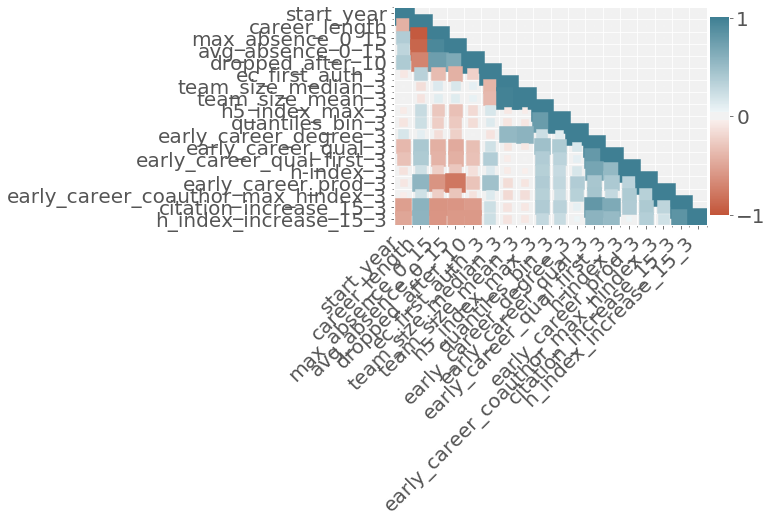

In [8]:
ax = heatmap.corrplot((correlations - upper).T)
plt.savefig('fig-desc/correlations.png')

In [9]:
cmap = sns.color_palette("RdBu_r", 7)

In [10]:
correlations[['h_index_increase_15_3', 'citation_increase_15_3']]

,h_index_increase_15_3,citation_increase_15_3
start_year,-0.493555,-0.530704
career_length,0.572736,0.585746
max_absence_0_15,-0.594536,-0.605504
avg_absence_0_15,-0.576339,-0.595164
dropped_after_10,-0.574093,-0.560303
ec_first_auth_3,0.226275,0.224667
team_size_median_3,-0.107912,-0.110894
team_size_mean_3,-0.086551,-0.087524
h5_index_max_3,0.281416,0.383135
quantiles_bin_3,0.255188,0.328601


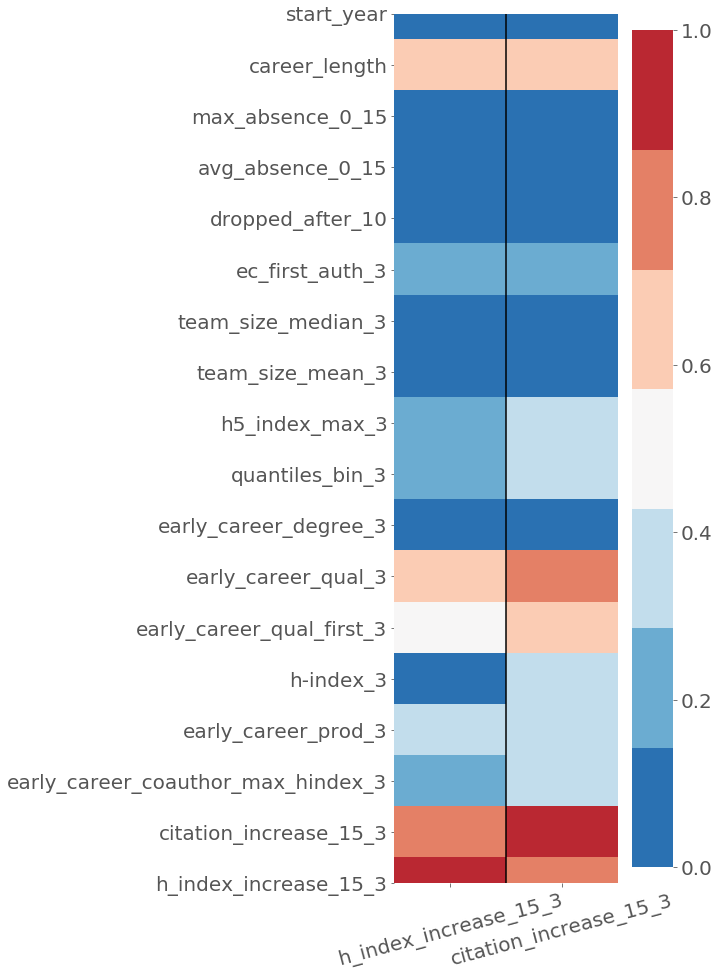

In [11]:
data = correlations[['h_index_increase_15_3', 'citation_increase_15_3']]
fig, ax = plt.subplots(figsize=(5, 16))
# akws = {"ha": 'center',"va": 'center'}
sns.heatmap(data, vmin=0, vmax=1, cmap=cmap) #, annot=True, annot_kws=akws)
ax.vlines([1], *ax.get_ylim())
plt.xticks(rotation=15)
plt.yticks(rotation=0)
plt.show()

In [12]:
cred_auth_mf = credible_authors[credible_authors['gender'].isin(['m', 'f'])].copy()
cred_auth_mf['gender_'] = cred_auth_mf['gender'].apply(lambda x: 1 if x=='m' else 0)

In [13]:
cred_auth_mf[['gender_', 'h_index_increase_15_3']].corr(method='spearman')

,gender_,h_index_increase_15_3
gender_,1.000000,0.064221
h_index_increase_15_3,0.064221,1.000000


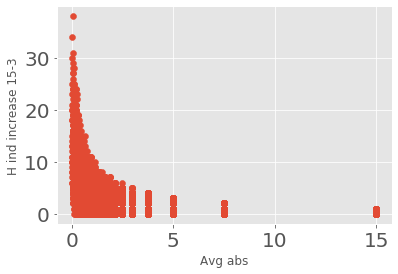

In [14]:
plt.scatter(credible_authors['avg_absence_0_15'], credible_authors['h_index_increase_15_3'])
plt.xlabel('Avg abs')
plt.ylabel('H ind increase 15-3')
# plt.xlim([-1, 20])
# plt.ylim([-1, 20])
plt.show()

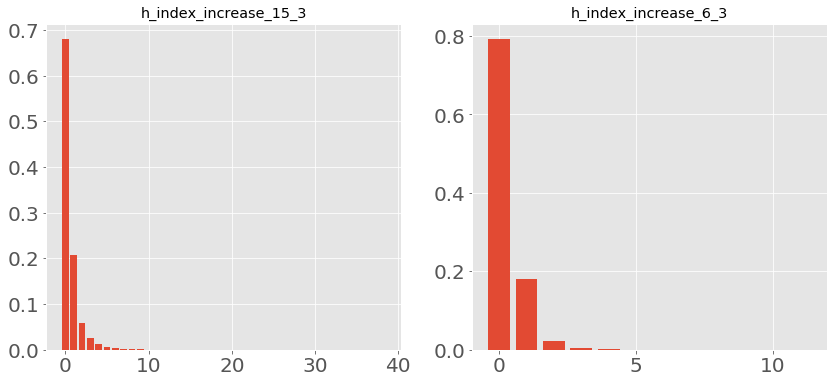

In [44]:
def plot_bars_rel_freq(crit1, crit2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    data = credible_authors[crit1].value_counts()
    data = data / data.sum()
    ax1.bar(data.index, data.values)
    ax1.set_title(crit1)

    data = credible_authors[crit2].value_counts()
    data = data / data.sum()
    ax2.bar(data.index, data.values)
    ax2.set_title(crit2)
plot_bars_rel_freq('h_index_increase_15_3', 'h_index_increase_6_3')

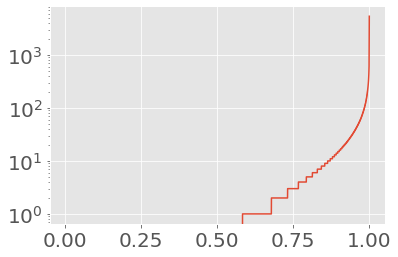

In [72]:
sorted_cit_incr = credible_authors['citation_increase_15_3'].sort_values().reset_index(drop=True)
x = sorted_cit_incr.index/sorted_cit_incr.shape[0]
plt.semilogy(x, sorted_cit_incr.values)

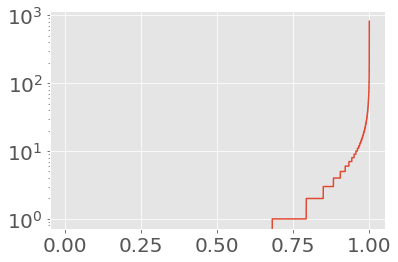

In [73]:
sorted_cit_incr = credible_authors['citation_increase_6_3'].sort_values().reset_index(drop=True)
x = sorted_cit_incr.index/sorted_cit_incr.shape[0]
plt.semilogy(x, sorted_cit_incr.values)

In [64]:
sorted_cit_incr.shape

(1688735,)

In [61]:
sorted_cit_incr.tail(20)

1688715    2745.0
1688716    2774.0
1688717    2864.0
1688718    2867.0
1688719    2942.0
1688720    3043.0
1688721    3057.0
1688722    3060.0
1688723    3061.0
1688724    3128.0
1688725    3332.0
1688726    3546.0
1688727    3837.0
1688728    3938.0
1688729    4209.0
1688730    4384.0
1688731    4557.0
1688732    4671.0
1688733    5343.0
1688734    5378.0
Name: citation_increase_15_3, dtype: float64

In [45]:
credible_authors.columns

Index(['author', 'start_year', 'end_year', 'total_num_pub', 'career_length',
       'gender', 'early_career_qual_3', 'early_career_qual_first_3',
       'early_career_recognition_EC3_RC3',
       'early_career_coauthor_max_hindex_3', 'team_size_median_3',
       'team_size_mean_3', 'early_career_degree_3', 'early_career_prod_3',
       'h5_index_max_3', 'deciles_min_3', 'quantiles_min_3', 'quantiles_bin_3',
       'ec_first_auth_3', 'max_absence_0_15', 'avg_absence_0_15',
       'dropped_after_5', 'dropped_after_10', 'h-index_3', 'h-index_6',
       'h-index_8', 'h-index_15', 'citation_count_3', 'citation_count_6',
       'citation_count_8', 'citation_count_15', 'citation_increase_6_3',
       'h_index_increase_6_3', 'citation_increase_8_3', 'h_index_increase_8_3',
       'citation_increase_15_3', 'h_index_increase_15_3'],
      dtype='object')

In [15]:
stop here

SyntaxError: invalid syntax (<ipython-input-15-a96ba3aab008>, line 1)

# Old stuff

## Test for errors in files

### Test if final citation count is working correctly

In [ ]:
final_less_than_early = credible_authors[credible_authors.succ_after_15y < credible_authors.early_career_qual_3].shape
assert final_less_than_early[0] == 0, "Final citation count is smaller than early in {} cases.".format(final_less_than_early[0])

In [ ]:
# Look for authors with more than 20K citations. Are they famous?
authors_5k = credible_authors[credible_authors['final_citation_count'] > 5000]

In [ ]:
authors_5k.index

In [ ]:
authors_5k.early_career_prod.value_counts().sort_index().plot(kind='bar')

In [ ]:
authors_5k.early_career_qual.value_counts().sort_index().plot(kind='bar')

In [ ]:
authors_5k.early_career_rec.value_counts().sort_index().plot(kind='bar')

In [ ]:
authors_5k[authors_5k.early_career_rec > authors_5k.early_career_qual]

In [ ]:
#credible_authors.drop(authors_20k, inplace=True)

In [ ]:
# Test for extremly high early productivity
# credible_authors[(credible_authors.early_career_prod_1 >= 10)].shape

In [ ]:
# credible_authors[(credible_authors.early_career_prod_1 >= 10)].start_year.value_counts().sort_index().plot(kind='bar')

### Test gender files

In [ ]:
sns.distplot(credible_authors.early_career_prod,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
import scipy
sns.set_palette("hls", 1)

# x,y = p.get_lines()[0].get_data()

#care with the order, it is first y
#initial fills a 0 so the result has same length than x
# cdf = scipy.integrate.cumtrapz(y, x, initial=0)

# nearest_05 = np.abs(cdf-0.5).argmin()

# x_median = x[nearest_05]
# y_median = y[nearest_05]

# plt.vlines(x_median, 0, y_median)
plt.show()

### Test gender files

In [ ]:
gender = pd.read_csv('./data/name_gender_2017_asiansAsNone_nodup.txt')

In [ ]:
gender_old = pd.read_csv('./data/name_gender_2017_asiansAsNone.txt')

In [ ]:
# import pickle
# gender_id = pickle.load(open('./data/id_gender_2017_asiansAsNone.p', "rb" ) )
# doesnt work. Python 3 vs 2?

In [ ]:
print(gender.shape)
print(gender_old.shape)

In [ ]:
gender.head()

In [ ]:
gender_old = gender_old.drop_duplicates()

In [ ]:
gender_old[gender_old.name.str.contains("robert")]

In [ ]:
gender[gender.name.str.contains("jorge santos")]

In [ ]:
## What is strange is that 'jorge santos 1' goes from none to 'm', but 'jorge santos' goes from 'm' to none

In [ ]:
gender.groupby('gender').count()

In [ ]:
gender_old.groupby('gender').count()

In [ ]:
merged = gender.merge(gender_old, on='name', suffixes=('_new', '_old'))

In [ ]:
merged.head()

In [ ]:
# Cases where we lose the gender by using new file ./data/name_gender_2017_asiansAsNone_nodup.txt
print(merged[(merged.gender_new != merged.gender_old) & (merged.gender_new!='none')])
print(merged[(merged.gender_new != merged.gender_old) & (merged.gender_new!='none')].shape)

In [ ]:
gender[gender.name.str.contains('michael r. smith')]

#### Analyze people that have digits in their names

In [ ]:
digits = gender[gender.name.str.contains('\d')]

In [ ]:
digits.gender.value_counts().plot(kind='bar')

In [ ]:
authors_digits = credible_authors.reset_index().merge(digits, left_on='author', right_on='name')

In [ ]:
digiAuthorPublicationData = authorPublicationData.merge(authors_digits, how="inner", on=["author"])

In [ ]:
authors_digits.shape

In [ ]:
print("Percentage of authors with numbers in names: ", authors_digits.shape[0]*100/credible_authors.shape[0])
print("Percentage of publications: ", authors_digits.num_pub.sum()*100/credible_authors.num_pub.sum())
print("Percentage of citations: ", authors_digits.final_citation_count.sum()*100/credible_authors.final_citation_count.sum())

In [ ]:
authors_digits.early_career_prod.value_counts().reset_index().plot(kind='scatter', x='index', y='early_career_prod')

In [ ]:
authors_digits.start_year.value_counts().sort_index().plot(kind='bar')

In [ ]:
authors_digits.num_pub.value_counts().reset_index().plot(kind='scatter', x='index', y='num_pub')

In [ ]:
authors_digits['pub_per_year'] = authors_digits.num_pub / authors_digits.career_length

In [ ]:
plt.plot(sorted(authors_digits['pub_per_year']))
plt.show()

In [ ]:
authors_digits[authors_digits['pub_per_year'] > 10]

In [ ]:
digiAuthorPublicationData.year.value_counts().sort_index().plot(kind='bar')

In [ ]:
authorPublicationData.year.value_counts().sort_index().plot(kind='bar')

## Citations distribution (based on IDs file)

In [ ]:
citation_distribution = credible_authors['final_citation_count'].value_counts().sort_index()

In [ ]:
plt.loglog(citation_distribution.index, citation_distribution.values)
plt.xlabel('Num citations')
plt.ylabel('Frequency')
plt.show()

## Early Career Prod. vs Final Success (ID file)

In [ ]:
credible_authors.sort_values(by='early_career_prod', inplace=True)

In [ ]:
x = credible_authors['early_career_prod']
y = credible_authors['final_citation_count']

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x, y)
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
plt.xlabel('Early Career Productivity')
plt.ylabel('Final Success')
# plt.xlim(0, 50)
# plt.ylim(0,200)
plt.show()

In [ ]:
credible_authors_no_uncited = credible_authors.dropna()

In [ ]:
x = credible_authors_no_uncited['early_career_prod']
y = credible_authors_no_uncited['final_citation_count']

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(r_value)
print(slope, intercept)

In [ ]:
fig, axs = plt.subplots()
axs.hist2d(x, y, bins=40, norm=colors.LogNorm())
plt.show()

## Early Career Prod. vs Early Career Qual. (IDs file)

In [ ]:
credible_authors.sort_values(by='early_career_prod', inplace=True)

In [ ]:
plt.scatter(credible_authors['early_career_prod'], credible_authors['early_career_qual'])
plt.xlabel('Early Career Productivity')
plt.ylabel('Early Career Quality')
plt.show()